In [1]:
import pandas as pd
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import normalize
from scipy.stats.stats import pearsonr
%matplotlib inline
df1 = pd.read_csv('timesData.csv')
df2 = pd.read_csv('shanghaiData.csv')
school_country = pd.read_csv('school_and_country_table.csv')
df3 = pd.read_csv('cwurData.csv')
attain_sup = pd.read_csv('educational_attainment_supplementary_data.csv')
expend_sup = pd.read_csv('education_expenditure_supplementary_data.csv', engine='python')

__Описание набора данных__
Данные представляют собой три независимых рейтинга университетов мира и две базы данных
* Рейтинг Times Higher Education World University Ranking 
* Рейтинг Academic Ranking of World Universities
* Рейтинг Center for World University Rankings

1. **Изучение характеристик рейтингов**

Times Higher Education World University Ranking
 * Количество наблюдений: 2603 
 * Количество переменных: 14


Academic Ranking of World Universities
 * Количество наблюдений: 4897 
 * Количество переменных: 11


Center for World University Rankings
 * Количество наблюдений: 2200 
 * Количество переменных: 14




Изучив времменые промежутки, которые охватывают данные рейтинги, мы выявили, что:
    * Times Higher Education World University Ranking включает в себя данные с 2011 по 2016 год
    * Academic Ranking of World Universities состоит из наблюдений за период с 2005 по 2015 год
    * Center for World University Rankings является самым молодым и включает данные с 2012 по 2015 год

исходя из этого, в дальнейшей работе мы будем анализировать данные с 2012 по 2015 год

Среди переменных __Academic Ranking of World Universities__ отсутствовала переменная, определяющая принадлежность университета к определенной стране. Мы восстановили ее, использовав дополнительную базу данных, в которой были представлены названия университетов и страны, в которых они расположены. Тепрь мы сможем посмотреть на распределение стран и определсить страны, университеты которых наиболее часто вкдюсаются в рейтинги


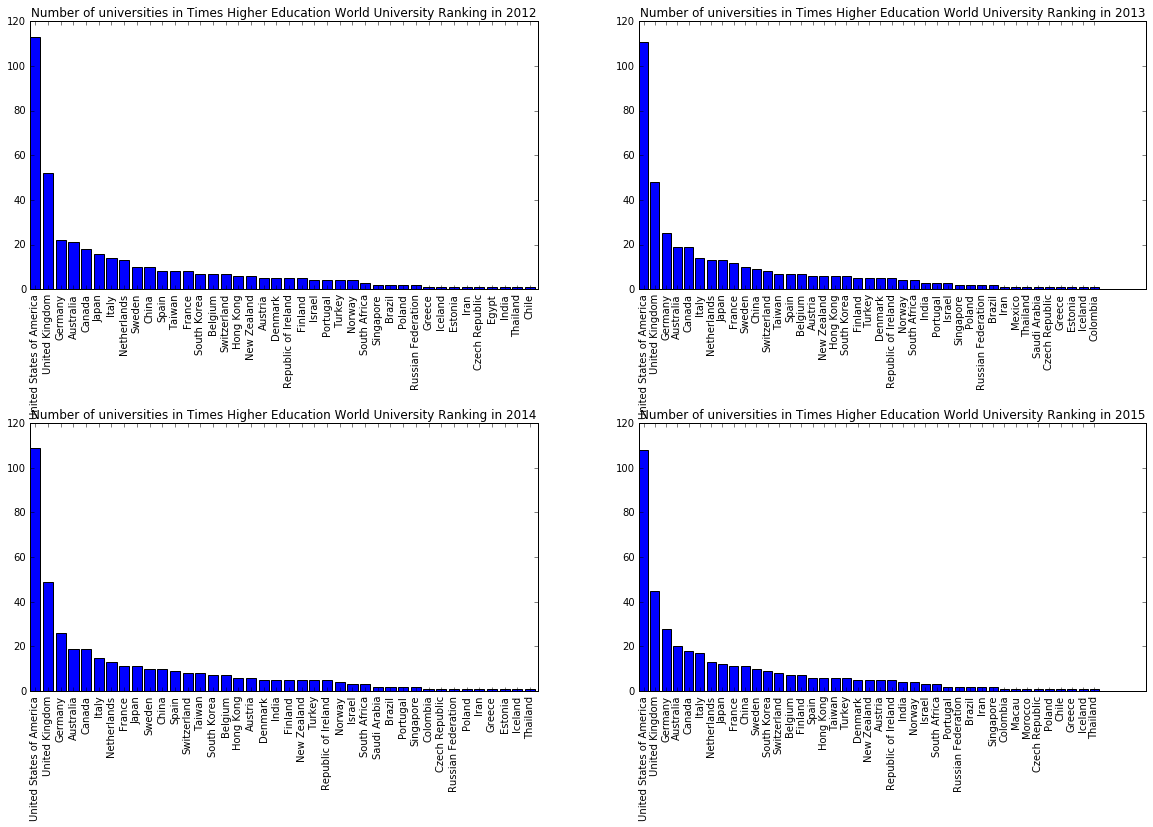

In [19]:
Страны с большим количеством университетов, включенных в международный рейтинг Times Higher Education World University:
    США, Великобритания, Германия, Канада, Австралия, Италия, Нидерланды, Япония

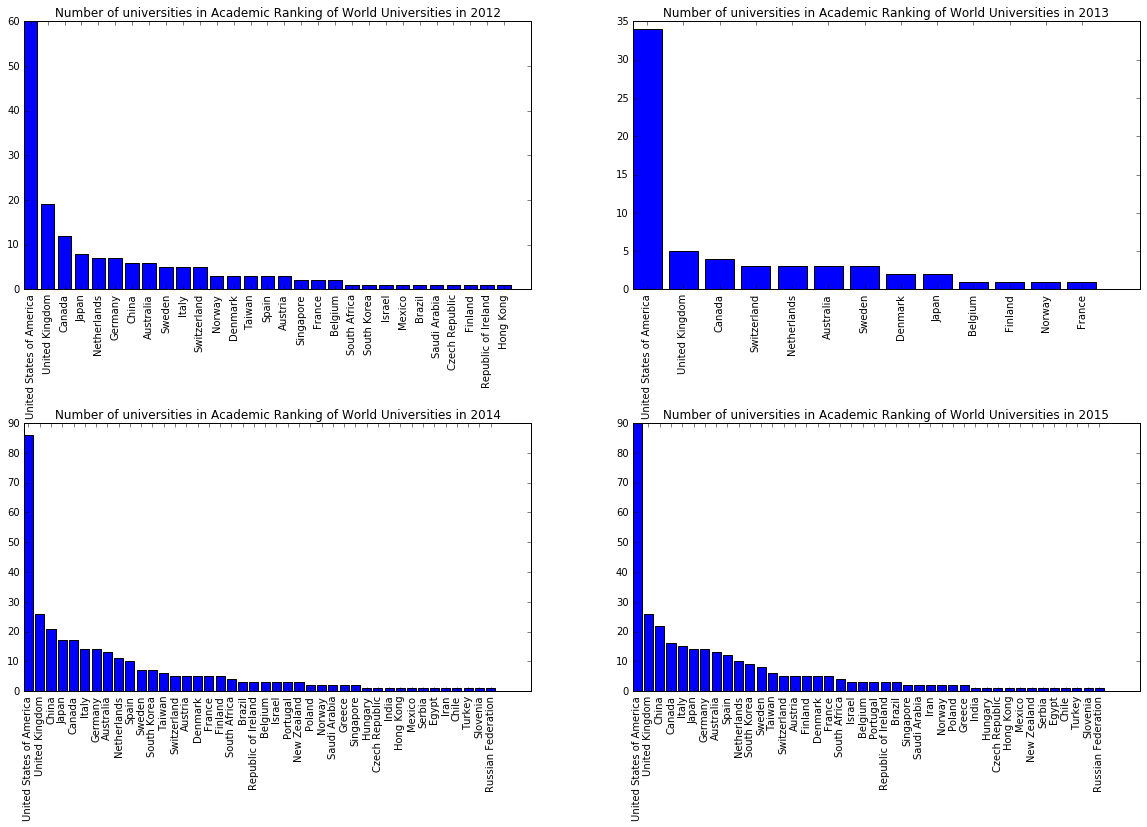

In [18]:
Наиболее часто во втором рейтинге встречаются страны: США, Великобритания, Канада, Германия, Италия, Нидерланды, Япония и Китай

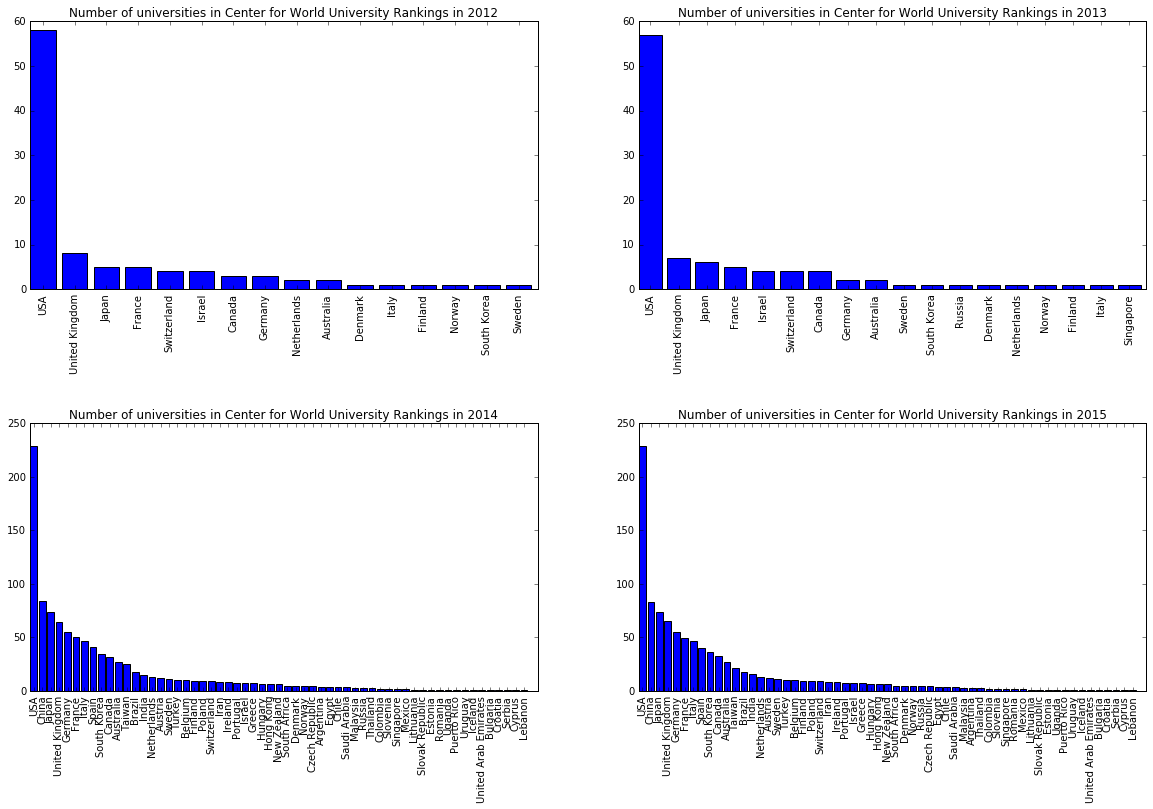

In [20]:
В третьем рейтинге преобладают США, Великобритания, Япония, Канада, Германия, Китай(в 2013, 2014)

По количеству университетов, вошедших в международные рейтинги, лидирующими странами являются 
* __США__
* __Великобритания__
* __Германия__
* __Нидерланды__
* __Япония__
* __Канада__

Изучив данные на наличие пропущенных значений, мы выявили наибольшее количество пропусков во втором рейтинге в переменной __total_score__

In [25]:
print ('Missing values in Academic Ranking of World Universities')
print('\n')
print(df2.loc[3614:4897].isnull().sum())
    

Missing values in Academic Ranking of World Universities


world_rank           0
university_name      1
national_rank        1
total_score        985
alumni               1
award                2
hici                 2
ns                   7
pub                  2
pcp                  2
year                 0
country              0
dtype: int64


Мы восстановили значения total score для рейтинга Academic Ranking of World Universities в период с 2012 по 2015, взяв детерминирующие переменные с определнными весами, которые используются при составлении рейтинга (из осписании методологии):
 * 10% Alumni
 * 20% Award
 * 20% HiCi
 * 20% N&S
 * 20% PUB
 * 10% PCP

Посмотрим на распределение показателя, который будет использоваться в качестве зависимой переменной при анализе

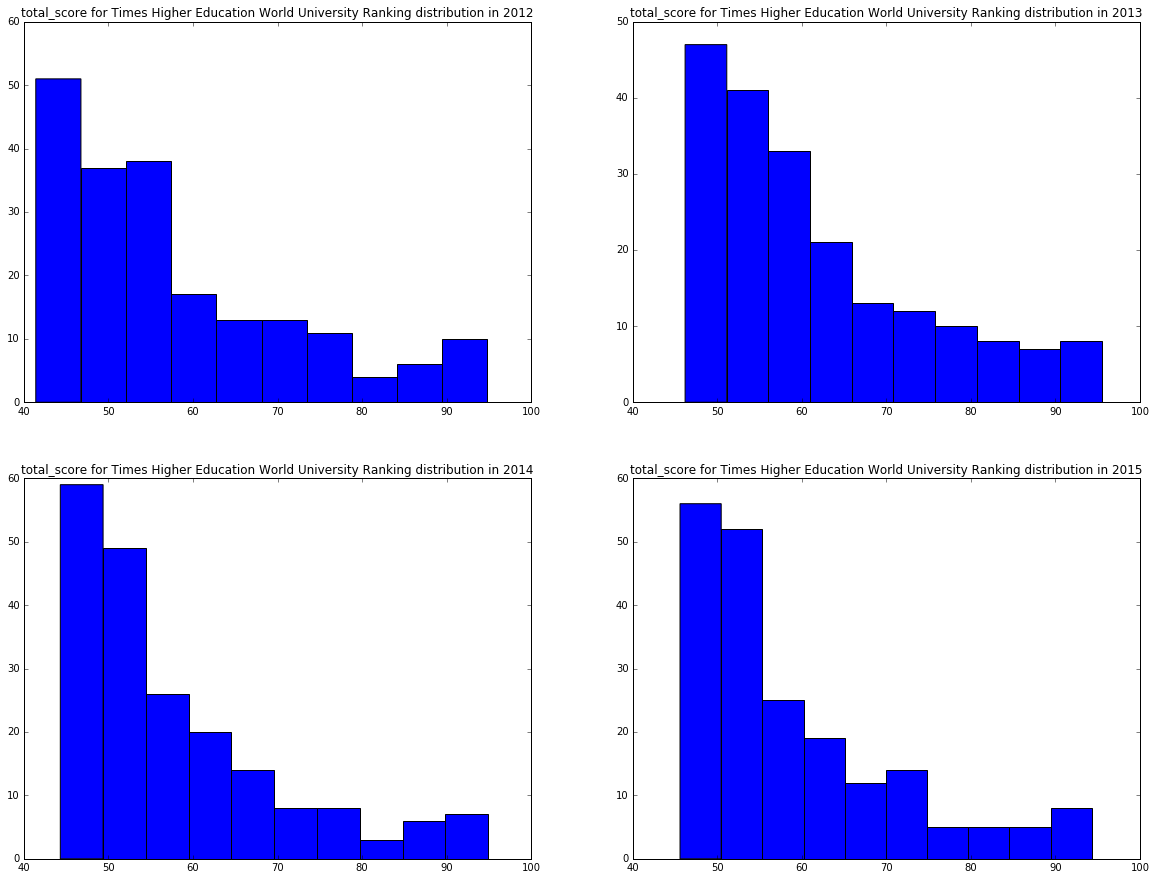

In [27]:
Times Higher Education World University Ranking

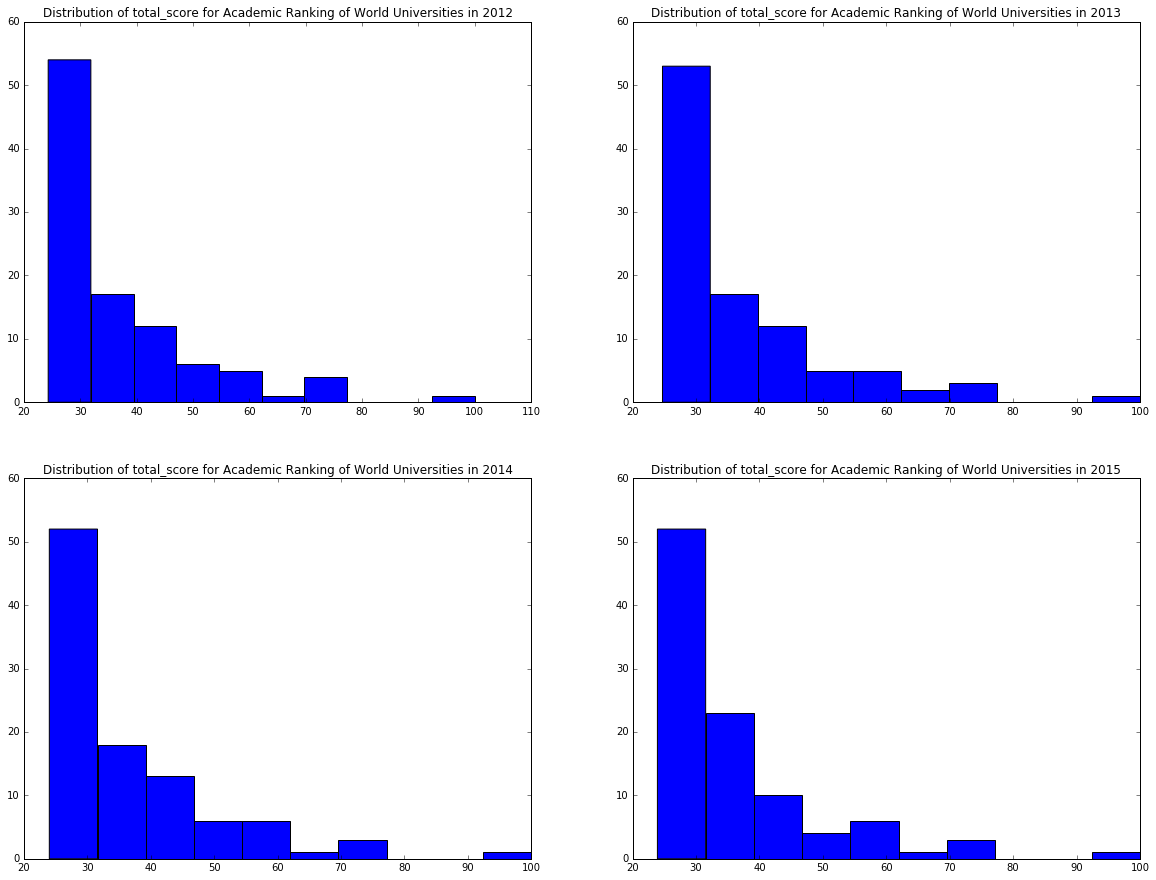

In [28]:
Academic Ranking of World Universities

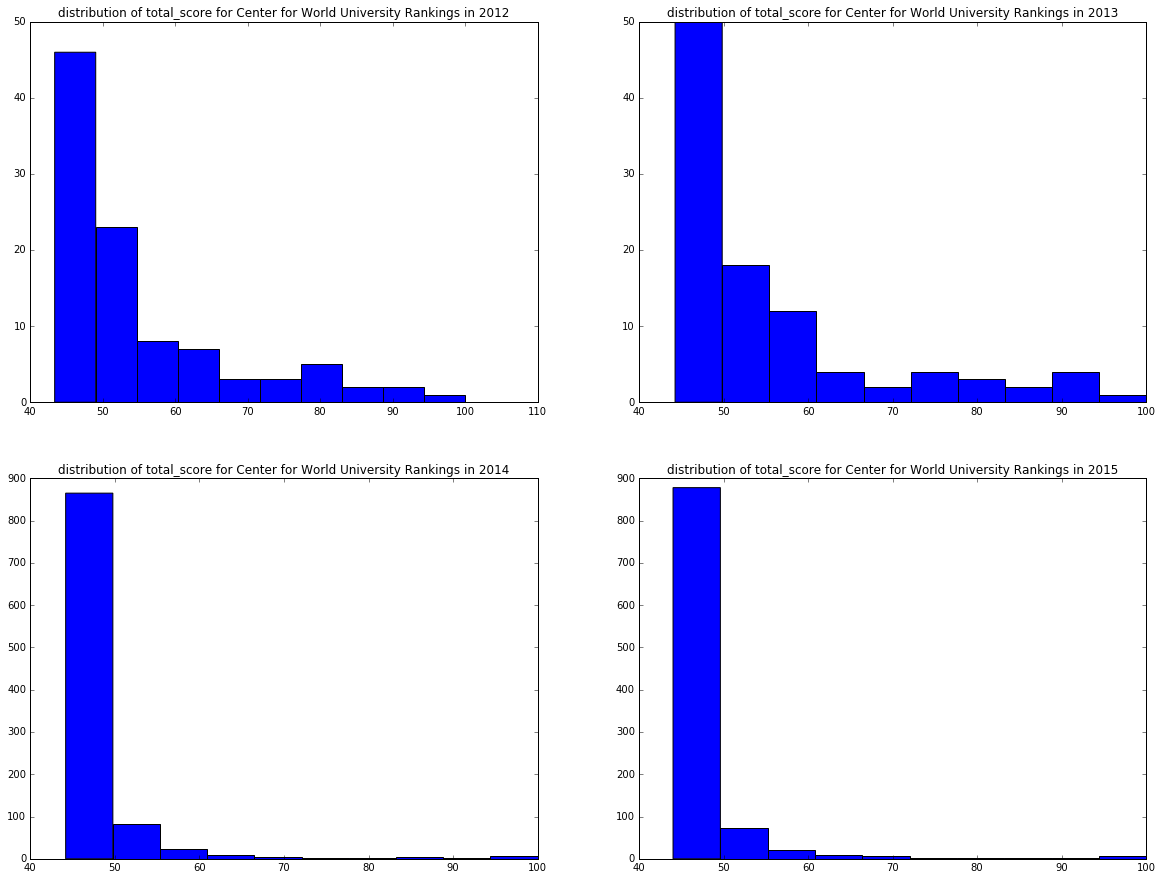

In [29]:
Center for World University Rankings 

Для первоначальной оценки признаков, их влиянии на зависимую переменную и друг на друга оценим взаимную коррелируемость компонент

In [48]:
Times Higher Education World University Ranking

,teaching,international,research,citations,income,total_score
teaching,1.000000,-0.078043,0.896440,0.233892,0.244288,0.904291
international,-0.078043,1.000000,0.033183,0.036881,-0.018783,0.118382
research,0.896440,0.033183,1.000000,0.191255,0.292691,0.912614
citations,0.233892,0.036881,0.191255,1.000000,-0.155825,0.529985
income,0.244288,-0.018783,0.292691,-0.155825,1.000000,0.222885
total_score,0.904291,0.118382,0.912614,0.529985,0.222885,1.000000


Все переменные имеют положительную корреляцию с total_score, при чем наиболее сильная взаимосвязь с переменными:
* research (0.912614)
* teaching (0.904291)

обознацим за недопустимую корреляцию между объясняющими переменными __корреляцию > 0.8__

   корреляция между переменными research и teaching является наибольшей 0.896439875864

так как обе переменные имеют положительное влияние на __total_score__, и переменная __research__ болле взаимосвязана с ней, то возможным является удаление переменной __teaching__ при построении линейной регрессии для первого рейтинга

In [47]:
Academic Ranking of World Universities

,total_score,alumni,award,hici,ns,pub,pcp
total_score,1.000000,0.798194,0.836879,0.868568,0.927606,0.611370,0.714306
alumni,0.798194,1.000000,0.785021,0.640844,0.715462,0.494477,0.670428
award,0.836879,0.785021,1.000000,0.686243,0.756549,0.445667,0.734128
hici,0.868568,0.640844,0.686243,1.000000,0.882472,0.666004,0.633877
ns,0.927606,0.715462,0.756549,0.882472,1.000000,0.680095,0.704033
pub,0.611370,0.494477,0.445667,0.666004,0.680095,1.000000,0.411891
pcp,0.714306,0.670428,0.734128,0.633877,0.704033,0.411891,1.000000


Все переменные имеют положительную корреляцию с total_score, при чем наиболее сильная взаимосвязь с переменными: 
* ns - баллы университета за публикации в Nature and Science
* hici - баллы университета за высоко оцененных исследователей 
* award - баллы университета за успешних преподавателей(лауреаты Нобелевской премии)

наибольшая корреляция между объясняющими переменными:  ns и hici 0.882471616806

Так как переменные ns и hici сильно коррелированы необходимо исключить из анализа одну из этих переменных, так как зависимость total_score с переменной ns выше (0.941100), чем с переменной hici (0.908155), то возможно в дальнейшем исключить переменную hici из анализа рейтинга Academic Ranking of World Universities

In [45]:
Center for World University Rankings

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
quality_of_education,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541
alumni_employment,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374
quality_of_faculty,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540
publications,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111
influence,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837
citations,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438
broad_impact,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590
patents,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810
score,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.531590,-0.474810,1.000000


Все переменные имеют отрицательную корреляцию с переменной __score__, так как в данном рейтинге наибольшее количество итоговых баллов присуждалось университету набравшему скммарно наименьшее количество очков (мест) по всем категориям. Ниболее коррелированы переменные: __quality_of_faculty (-0.693540) и quality_of_education (-0.600541)__

Наиболее коррелированные компоненты: 
  * influence publications 0.874951645927
  * citations publications 0.829911697177
  * citations influence 0.845206806088
  * broad_impact publications 0.917877845939
  * broad_impact influence 0.916040261401
  * broad_impact citations 0.852638025259

при построении линейной регрессии мы оставляем переменнюю __citations__

__Анализ данных__

__1. Построение и оценка моделей для первого рейтинга__

Для анализа первого рейтинга мы использовали модели:
    

__1.1 Модель линейной регрессии__

Свободный член 2.33097494774

Коэффициенты

* research 0.525942462694
* international 0.0598159379939
* citations 0.325273637756
* income 0.0202611160728



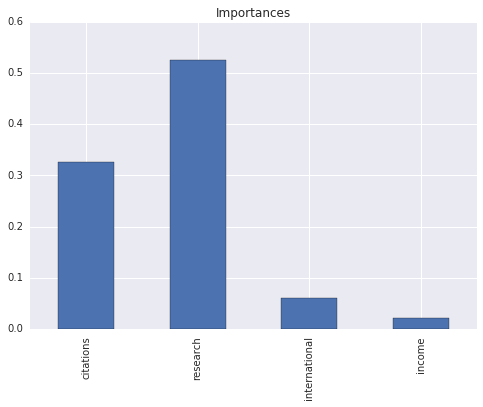

Ошибка на тестовой выборке: 4.27437838584 

Средняя квадратичная ошибка на обучающей выборке: 4.63001129462

Объясняющая способность модели (R^2) 0.97

При изменении всех признаков на 1, значение для зависимой переменной меняется на 0.931293154517

Как видно из полученных статистик модель обладает высокой объясняющей способностью и при этом средняя квадратичная ошибка тестовой выборки не сильно отличается от ошибки на обучающей выборке, значение R^2 почти 1, что говорит о том, что total_score почти линейно зависит от признаков. Наиболее важные признаки - Исследования и цитирование

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C80C60860>]], dtype=object)

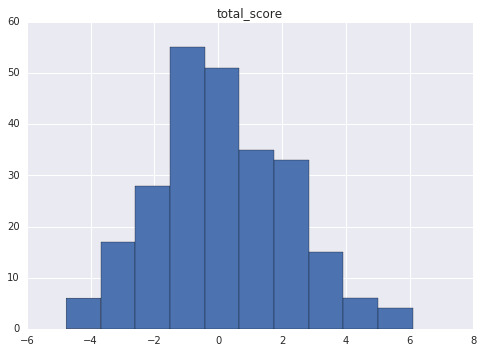

In [52]:
Анализ остатков коэффициентов регрессии показал, что в модели отутствует гетероскедастичность, так как их распределение 
близко к нормальному

 __1.2 Модель Decision Tree Regression__

Выбор гиперпараметров: оптимальная глубина дерева решений(при минимальной средней квадратичной ошибке)


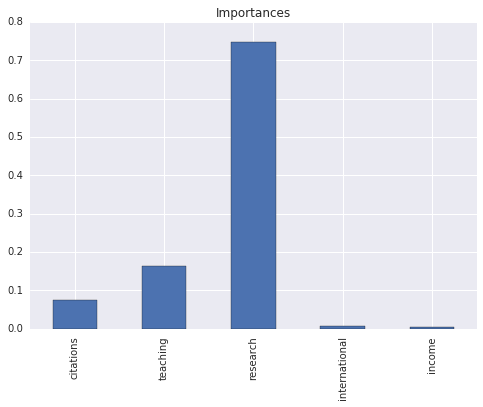

In [74]:
Модель показала следующую значимость признаков:

Ошибка на тестовой выборке: 5.66316

Ошибка на обучающей выборке: 0.0

Объясняющая способность модели (R^2): 0.963330290553

Точность модели высокая, но она ниже в сравнение с точностью модели линейной регрессии. Ошибка на тестовой выборке значительно выше, чем на обучающей 

__1.3 Модель Random Forest Regression__

Выбор гиперпараметров: оптимальное количество деревьев 

* Ошибка на тестовой выборке: 2.35101227173
* Ошибка на обучающей выборке:0.391499090382
* Объясняющая способность модели (R^2):0.984776884829

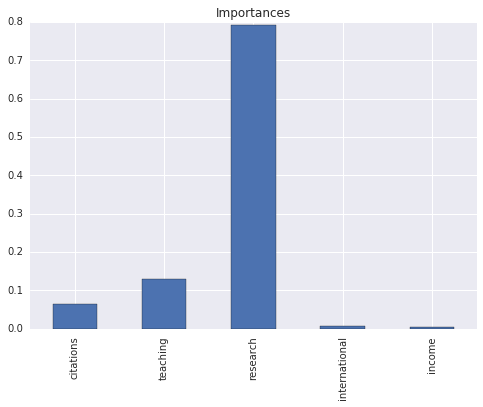

In [80]:
Важность признаков модели

Объясняющая способность модели лучше предыдущих, однако средняя квадратичная ошибка на ней выше, чем в модели линейной регрессии

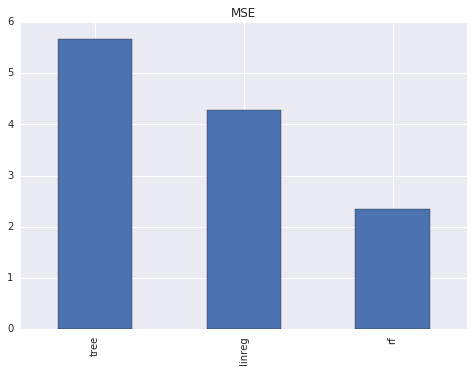

In [83]:
pd.DataFrame.from_dict(data = mse1, orient='index').plot(kind='bar', legend=False, title = 'MSE')

Выводы по первому рейтингу:
    
   Судя по полученным результатам различных регрессий, total_score строится линейно, возможно, с какими-то небольшими нюансами,
   такими, как округление.

__2. Построение и оценка моделей для второго рейтинга__



__2.1 Модель линейной регрессии__

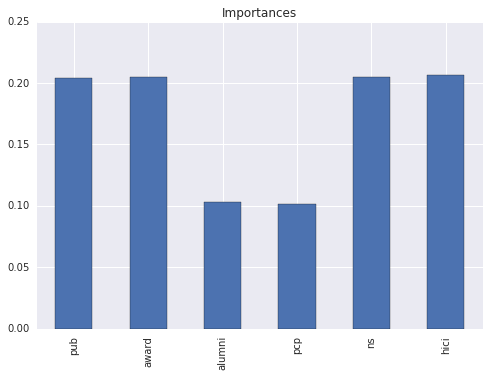

In [87]:
Свободный член -0.344114980273
Коэффициенты
* alumni 0.103233297741
* award 0.209308326863
* hici 0.209877608975
* ns 0.204185101332
* pub 0.205790214964
* pcp 0.100097991822

Ошибка на тестовой выборке: 0.0475231065685 

Ошибка на обучающей выборке: 0.0369862598233

Объясняющая способность модели (R^2): 1.00

С учетом того, что мы восстанавливали значения зависимой переменной, используя детерминирующие переменные с определенными весами, линейное построение данного рейтинга полностью подтвердилось, погрешность весов и ошибка очень низки, а изменение total_score при увеличении всех признаков на 1 примерно равно 1.03

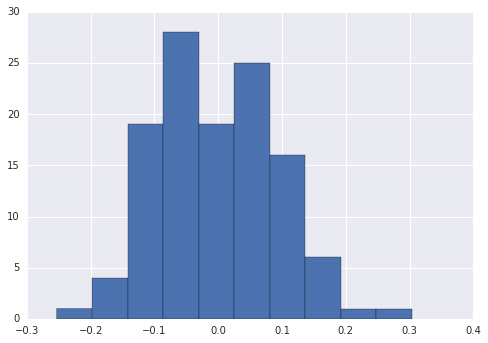

In [57]:
Гистограмма остатков имеет нормальное распределение

__3. Построение и оценка моделей для третьего рейтинга__

__3.1 Модель линейной регрессии__

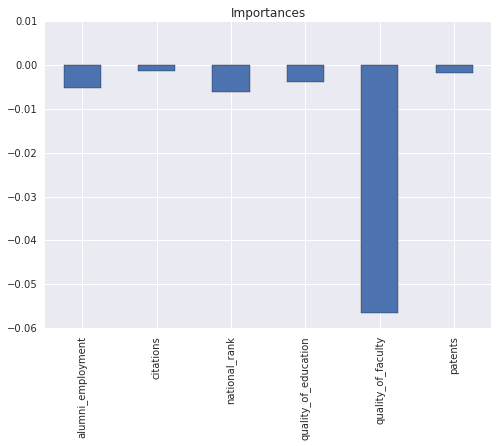

In [89]:
Свободный член 62.3399870355

Коэффициенты
* national_rank -0.00614052086837
* quality_of_education -0.00380189346447
* alumni_employment -0.00516643670682
* quality_of_faculty -0.0566355123658
* citations -0.00141823015445
* patents -0.00181203929468

Ошибка на тестовой выборке: 30.7227306999 

Ошибка на обучающей выборке: 29.0342204421

Объясняющая способность модели (R^2): 0.55



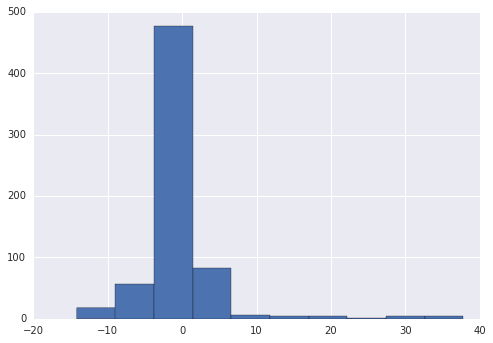

In [63]:
Гистограмма остатков не соответствует нормальному распределениюю. Построение данного рейтинга по признакам явно не линейно

__3.2 Модель Decision Tree Regression__
Выбор гиперпараметров: оптимальная глубина дерева решений(при минимальной средней квадратичной ошибке)



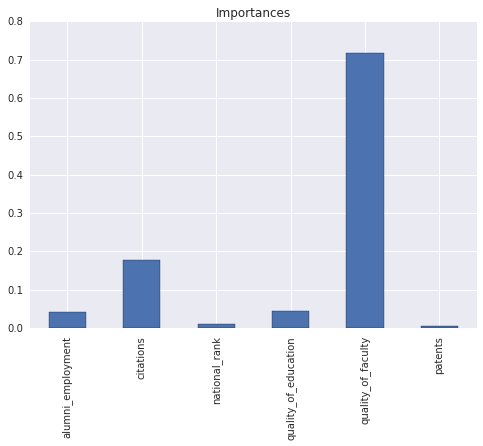

In [92]:
Модель показала следующую значимость признаков:

Ошибка на тестовой выборке: 4.29859615392

Ошибка на обучающей выборке: 0.0959388975781

Объясняющая способность модели (R^2): 0.937636578305

Несмотря на то, что точность довольно высокая, различия на тестовой и обучающей выборке весьма существенные

__3.3 МодельRandom Forest Regression__

Выбор гиперпараметров: оптимальное количество деревьев 

Наиболее важный признак - качество преподавательского состава

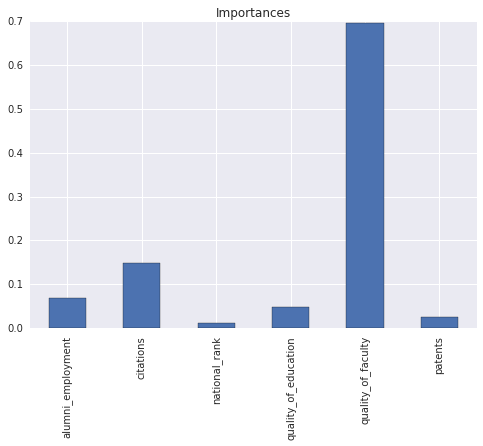

In [95]:
Оценки важности переменных:

* Ошибка на тестовой выборке: 1.95821532729
* Ошибка на обучающей выборке: 0.269357654887
* Объясняющая способность модели (R^2): 0.971590490511


Точность получлась лучшей из 3х моделей, различия оценки на тестовой и обучающей выборке невысокие

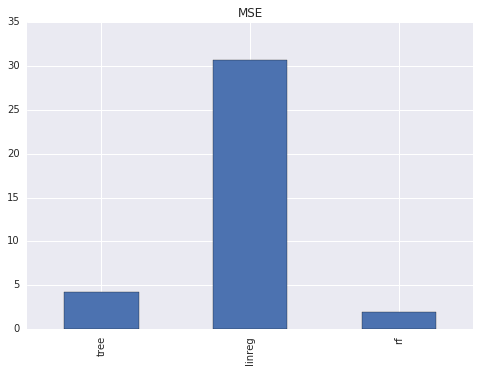

In [96]:
Сравнение средней квадратичной ошибки по 3 моделям для третьего рейтинга

__3.4 Классификация. Применение логистической регрессии и метода наивного Байеса__

Возьмем вузы из 3го рейтинга за 2014 й год и разобьем их на 20 классов(уровней) от 0 до 19

In [67]:
Классификация с помощью логистической регрессии

             precision    recall  f1-score   support

          0       0.56      0.80      0.66        50
          1       0.54      0.30      0.38        50
          2       0.45      0.56      0.50        50
          3       0.24      0.12      0.16        50
          4       0.27      0.40      0.32        50
          5       0.23      0.12      0.16        50
          6       0.15      0.28      0.20        50
          7       0.19      0.14      0.16        50
          8       0.16      0.22      0.19        50
          9       0.14      0.18      0.16        50
         10       0.33      0.02      0.04        50
         11       0.11      0.10      0.11        50
         12       0.03      0.02      0.02        50
         13       0.00      0.00      0.00        50
         14       0.20      0.22      0.21        50
         15       0.18      0.38      0.24        50
         16       0.17      0.02      0.04        50
         17       0.12      0.04      0.06   

При использовании l1 точность немного повышается

In [69]:
Классификация методом наивного Байеса

GaussianNB()
             precision    recall  f1-score   support

          0       0.66      0.74      0.70        50
          1       0.56      0.54      0.55        50
          2       0.41      0.32      0.36        50
          3       0.23      0.14      0.18        50
          4       0.41      0.14      0.21        50
          5       0.33      0.08      0.13        50
          6       0.00      0.00      0.00        50
          7       0.11      0.02      0.03        50
          8       0.00      0.00      0.00        50
          9       0.00      0.00      0.00        50
         10       0.00      0.00      0.00        50
         11       0.06      0.40      0.11        50
         12       0.00      0.00      0.00        50
         13       0.00      0.00      0.00        50
         14       0.00      0.00      0.00        50
         15       0.10      0.30      0.15        50
         16       0.00      0.00      0.00        50
         17       0.00      0.00

C:\Users\1405\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Оба метода показали не самую лучшую точность, особенно плохо предсказываются уровни вузов в середине рейтинга (что логично, так как ошибка приходится в 2 стороны) Но всё же логистическая регрессия оказалась более точной.